In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import math

In [2]:
table = {
    'name': ['James', 'Barra', 'Sarah', 'Bill', 'Peter', 'Chloe', 'Ben', 'Anna'],
    'gender': ['M', 'M', 'F', 'M', 'M', 'F', 'M', 'F'],
    'age': [27, 32, 34, 23, 27, 32, 34, 23],
    'weight': [75.1, 98.3, 63.5, 87.2, 75.1, 98.3, 63.5, 87.2],
    'height': ['Short', 'Short', 'Medium', 'Tall', 'Short', 'Short', 'Medium', 'Tall']
}

df = pd.DataFrame(table)
df

,name,gender,age,weight,height
0,James,M,27,75.1,Short
1,Barra,M,32,98.3,Short
2,Sarah,F,34,63.5,Medium
3,Bill,M,23,87.2,Tall
4,Peter,M,27,75.1,Short
5,Chloe,F,32,98.3,Short
6,Ben,M,34,63.5,Medium
7,Anna,F,23,87.2,Tall


(array([2., 0., 0., 2., 0., 0., 0., 0., 2., 2.]),
 array([23. , 24.1, 25.2, 26.3, 27.4, 28.5, 29.6, 30.7, 31.8, 32.9, 34. ]),
 <BarContainer object of 10 artists>)

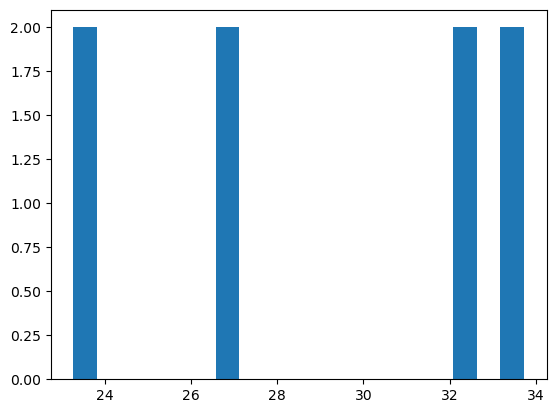

In [3]:
plt.hist(df['age'], rwidth=0.5)

In [113]:
def binningFn(col, no_of_bins):
    col_list = col.tolist()
    gap = (col.max() - col.min()) / no_of_bins
    print('Gap:', gap)

    bins_list = []
    for i in range(no_of_bins):
        lower = col.min() + (gap * i)
        upper = round(lower + gap)
        print(lower, upper)

        interval = pd.Interval(lower, upper, closed='both')
        print('Interval: ', interval)

        bins_list.append([val for val in col_list if val in interval])

    bins_list = pd.Series(bins_list)
    return bins_list

Gap: 3.6666666666666665
23.0 27
Interval:  [23.0, 27]
26.666666666666668 30
Interval:  [26.666666666666668, 30]
30.333333333333332 34
Interval:  [30.333333333333332, 34]


<Axes: >

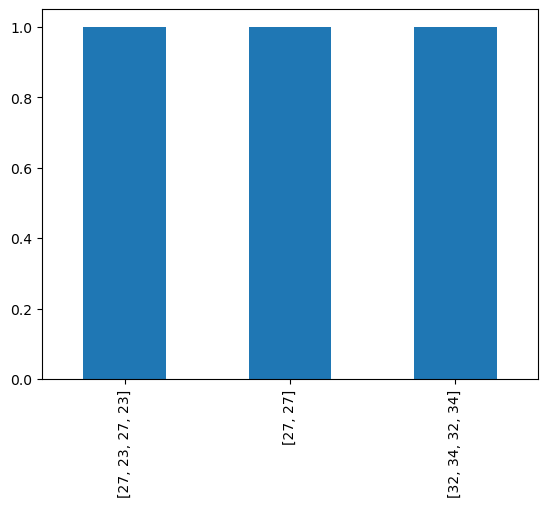

In [120]:
ages = binningFn(df['age'], 3)
ages.value_counts().plot(kind='bar')

In [115]:
df['Type'] = pd.qcut(df['age'], q = 3, labels=['Young', 'Mid', 'Old'])

<Axes: xlabel='Type'>

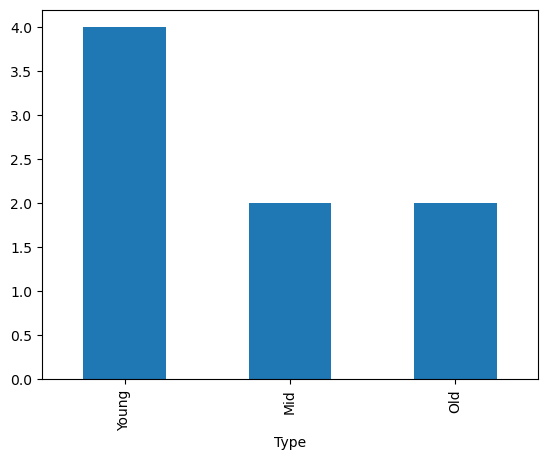

In [116]:
df['Type'].value_counts().plot(kind='bar')